<div align='center'><a href='https://www.facebook.com/fea.dev/'/ style='display:inline-block'>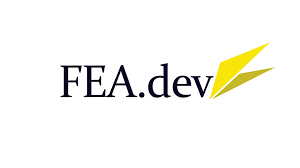<a/><div/>

# <font color=blue|blue|red>**Jupyter Notebook**</font> 
### 1) O que é o Jupyter Notebook?
O Jupyter Notebook é um documento que permite você executar códigos em Python e escrever textos como um word, tudo em um mesmo lugar.

### 2) Como eu faço para rodar o código?
Para rodar uma célula basta clicar na célula e precionar **Shift + Enter**. Você também pode rodar uma célula ou mais de uma pelo menu de opções na aba "Cell". A células são os retângulos, que podem conter um código em Python ou um texto escrito.

Caso você clique nos textos e a formatação dele fique estranha basta rodar essa célula para corrigir.


### 3) Porquê eu posso obter diferentes resultados toda vez que eu rodo a mesma célula?
Quando você roda uma célula isso atualiza alguma variável (ex, x = x+1), assim você terá resultados diferentes para x enquanto você rodar várias vezes essa célula.

### 4) Estou travado em algum exercício, o que eu faço?
Nós recomendamos que você busca alguem do FEA.dev ou busque informações no Google ou no Stack Overflow. 

### 5) Como eu salvo o meu progresso?
Clique em "File" na barra de opções e por fim clique na opção "Save and Checkpoit"

### 6) O que devo fazer se o meu Jupyter travar?
Caso isso acontece você pode tentar reiniciar o Kernel clicando em "Kernel" na barra de opções, e por fim selecionando a opção "Restart"

### 7) Ainda estou com dúvidas sobre o Jupyter.
Caso isso ocorra pode nos chamar ou se preferir pode assistir o seguinte vídeo: https://www.youtube.com/watch?v=dPb4acFiaYs

# <font color = blue|blue|red >**Aula 6: VaR CVaR**</font> 
## <font color=blue|blue|red>O que esperar do Curso?</font>

Bem vindo(a) ao Curso de Finanças Quantitativas em Python do FEA.dev. <ins>**_O objetivo desse curso é ensinar à você como construir e gerir uma carteira de investimento de forma sistematizada_**</ins>. Para isso vamos abordar temas como criação e gestão de portfólio; extração de dados; visualização de dados; análise de risco, entre outros, tudo isso utilizando Python.


### <font color=green|black>**Tópicos da Aula:** </font>
- Conceito de VaR e CVaR
- Aplicação em python (diversos tipos)

### <font color=green|black>**Tenho Dúvidas!** </font>
Caso tenha qualquer dúvida <ins>**_sinta-se livre para chamar qualquer um dos nossos membros pelo nosso Instagram ou email_**</ins>. Além disso, outra ótima ferramenta para se tirar dúvidas e fazer pesquisas é o Stack Overflow. Lembrando que se possível, quando for pesquisar no Google, é recomendado que a faço em inglês, devido a maior disponibilidade de informações.
> Email: duvidas.feadev@gmail.com

> Instagram: https://www.instagram.com/fea.dev/

## O que é VaR?

### Value At Risk

Quantificar possíveis perdas em um determinado período de tempo

Se um determinado ativo tem, para um dia, VaR(95) = 2% significa que tenho **95%** de certeza que minhas perdas **não serão maiores** do que **2%**, ou que há uma possibilidade de **5%** de minhas **perdas excederem** **2%**.

In [2]:
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bbdc3.csv", parse_dates=[0], index_col=0)

In [3]:
df = df.pct_change().drop(df.index[0])

In [4]:
df.head()

,fechamento
data,
2020-06-02,0.037807
2020-06-03,0.044930
2020-06-04,0.004067
2020-06-05,0.023148
2020-06-08,0.048077


## VaR Histórico

In [5]:
print("numpy percentile:", - np.percentile(df, 5))
print("pandas quantile:", - df.quantile(.05))

numpy percentile: 0.03083039718517744
pandas quantile: fechamento    0.03083
Name: 0.05, dtype: float64


In [6]:
%%timeit
np.percentile(df, 5)

116 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%%timeit
np.quantile(df, .05)

113 µs ± 886 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
%%timeit
df.quantile(.05)

359 µs ± 8.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## VaR paramétrico (gaussiano)

**Momentos:**
1. Média
2. Variância
3. Skewness (Assimetria)
4. Kurtosis (Curtose)

### Média

$$
\frac{\sum{x}}{n}
$$

### Variância
$$
\frac{\sum{(x - \mu)^2}}{n}
$$

### Skewness
$$
\frac{1}{n}\frac{\sum{(x - \mu)^3}}{\sigma^3}
$$

### Kurtosis
$$
\frac{1}{n}\frac{\sum{(x - \mu)^4}}{\sigma^4}
$$

In [ ]:
média = 0
variancia = 1
skewness = 0
curtose = 3

(0.0, 0.41871903581662334)

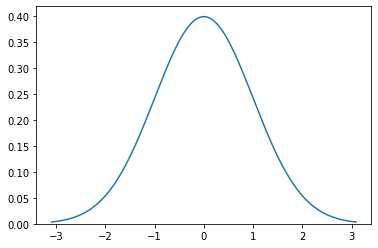

In [8]:
x = np.linspace(scipy.stats.norm.ppf(0.001), scipy.stats.norm.ppf(.999), 1000)
fig, ax = plt.subplots(1)
ax.plot(x, scipy.stats.norm.pdf(x))
ax.set_ylim(ymin=0)

(0.0, 0.6905419192513038)

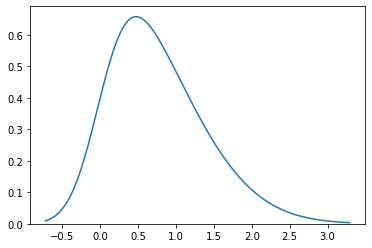

In [9]:
skw = 3
x = np.linspace(scipy.stats.skewnorm.ppf(0.001, skw), scipy.stats.skewnorm.ppf(.999, skw), 1000)
fig, ax = plt.subplots(1)
ax.plot(x, scipy.stats.skewnorm.pdf(x, skw))
ax.set_ylim(ymin=0)

(-6.0, 6.0)

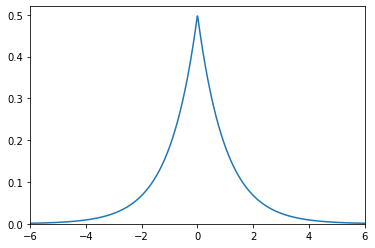

In [14]:
x = np.linspace(scipy.stats.laplace.ppf(0.001), scipy.stats.laplace.ppf(.999)+3, 1000)
fig, ax = plt.subplots(1)
ax.plot(x, scipy.stats.laplace.pdf(x, 0))
ax.set_ylim(ymin=0, ymax=.52)
ax.set_xlim(xmin=-6, xmax=6)

In [11]:
print("percentil de 5% de laplace:", scipy.stats.laplace.ppf(.05), "\npercentil de 5% de distribuição normal:", scipy.stats.norm.ppf(.05))

percentil de 5% de laplace: -2.3025850929940455 
percentil de 5% de distribuição normal: -1.6448536269514729


In [12]:
(len(df) / ((len(df) - 1) * (len(df) - 2))) * (((df - df.mean())**3).sum()/(df.std()**3))

fechamento    0.46194
dtype: float64

In [15]:
print("Skewness:", scipy.stats.skew(df))
print("Kurtosis:", scipy.stats.kurtosis(df))

Skewness: [0.45935022]
Kurtosis: [0.95575887]


In [16]:
# VaR
z = scipy.stats.norm.ppf(.05)

- (df.mean() + z*df.std(ddof=0))

fechamento    0.034398
dtype: float64

## Cornish-Fisher

Semi paramétrica
Expansão de Cornish-Fisher

Permite relacionar o modelo não paramétrico com o paramétrico.

$$
z^\text{'}_a = z_a + \frac{1}{6}(z^2_a - 1)S + \frac{1}{24}(z^3_a - 3z_a)(K - 3) - \frac{1}{36}(2z^3_a - 5z_a)S^2
$$

$z_a$

In [19]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(df)
k = scipy.stats.kurtosis(df)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

-(df.mean() + z*df.std(ddof=0))

fechamento    0.031056
dtype: float64

## CVaR

"Expected shortfall"

A média da perda nos x% piores casos

In [20]:
z = scipy.stats.norm.ppf(.05)
s = scipy.stats.skew(df)
k = scipy.stats.kurtosis(df)

z = z +\
    (z**2 - 1) * s / 6 +\
    (z**3 - 3*z) * k / 24 -\
    (2 * z**3 - 5*z) * s**2 / 36

var = -(df["fechamento"].mean() + z*df["fechamento"].std(ddof=0))[0]

In [23]:
df[df["fechamento"] <= -var]

,fechamento
data,
2020-06-10,-0.040349
2020-07-07,-0.041249
2020-07-31,-0.036002
2020-08-31,-0.045191
2020-09-10,-0.033487
2020-10-28,-0.060206
2020-11-12,-0.035171
2021-01-15,-0.037123
2021-02-22,-0.057113


In [24]:
-df[df["fechamento"] <= -var].mean()

fechamento    0.040381
dtype: float64